## Real Estate Project

#### Aim : To predict if a building will have an insurance claim during a certain period or not.
#### Objective : To create a binary classification model to this perform this aim
#### Business problem : Predicting if a customer will request for insurance claim within a specific insured period 
#### Machine Learning problem : Understanding the given parameters, and checking how these parameter affect the insurance claim for the historical dataset
___
#### Methodology
* Import libraries
* Load dataset
* User defined functions
* Exploratory Data Analysis
* Check for anomalies, that is, outliers/noise, and clean the data
* Preprocessing
* Feature selection and engineering
* Dealing with imbalanced dataset
* Build models and make predictions
* Check for accuracy, using evaluation metrics
* Present / Submit the results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Real_estate(cleaned).csv', parse_dates = ['date_sale', 'birth_date'])

In [3]:
def quality_report(df):
    
    """
    Description: Displays quality of data in terms of missing values, number of unique values,
    percentage of missing values and data type.
    
    Arguement: Dataframe
    """
    
    dtype = df.dtypes
    nunique = df.nunique()
    null_values = df.isna().sum()
    percent = (df.isna().sum()/df.count()*100).round(2)
    report_df = pd.concat([nunique, null_values, percent, dtype], axis = 1, keys = ['Nunique', 'Total_NaN', 'Percentage of NaN', 'Dtypes'])
    return report_df

def object_count_plot(df):
    
    """
    Description: Plots countplot for all categotical features in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for var in df.columns.difference(['Customer_Id']):
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize = (12, 7))
            plot = sns.countplot(x = var, data = df)
            plt.tight_layout()
            plt.show()
    return plot

def num_dist_plot(df):
    
    """
    Description: Plots distribution plot for the numerical features selected in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize = (12, 7))
            print(col)
            plt.title('Distribution plot for ' + col)
            plot = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

In [4]:
# eda_report_train = ProfileReport(data)
# eda_report_train.to_file("eda_report_data.html")

In [5]:
data

,id,building,date_sale,type,property_number,area,status,customerid,entity,name,surname,birth_date,gender,country,state,purpose,deal_satisfaction,mortgage,source,price($)
0,ID_1030,building_1,2005-11-01,Apartment,property_30,743.09,Sold,C0028,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website,246172.68
1,ID_1029,building_1,2005-10-01,Apartment,property_29,756.21,Sold,C0027,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website,246331.90
2,ID_2002,building_2,2007-07-01,Apartment,property_2,587.28,Sold,C0112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client,209280.91
3,ID_2031,building_2,2007-12-01,Apartment,property_31,1604.75,Sold,C0160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,452667.01
4,ID_1049,building_1,2004-11-01,Apartment,property_49,1375.45,Sold,C0014,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency,467083.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ID_1042,building_1,2005-07-01,Apartment,property_42,625.80,Sold,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,No,Website,204027.09
196,ID_1002,building_1,NaT,Apartment,property_2,1238.58,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400865.92
197,ID_1003,building_1,NaT,Office,property_3,713.71,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217787.71
198,ID_1008,building_1,NaT,Apartment,property_8,763.21,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219630.90


In [6]:
quality_report(data)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
id,195,0,0.00,object
building,5,0,0.00,object
date_sale,43,5,2.56,datetime64[ns]
type,2,0,0.00,object
property_number,58,0,0.00,object
area,78,0,0.00,float64
status,1,5,2.56,object
customerid,162,5,2.56,object
entity,2,5,2.56,object
name,159,5,2.56,object


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,200.0,903.78785,267.094733,410.71,741.4750,788.01,1097.0625,1942.50
deal_satisfaction,195.0,3.60000,1.340872,1.00,3.0000,4.00,5.0000,5.00
price($),200.0,270777.63080,81988.147251,117564.07,213587.1275,243838.73,310311.7275,532877.38


In [8]:
data[data.id.duplicated()]

,id,building,date_sale,type,property_number,area,status,customerid,entity,name,surname,birth_date,gender,country,state,purpose,deal_satisfaction,mortgage,source,price($)
181,ID_1009,building_1,2004-11-01,Office,property_10,800.96,Sold,C0012,Company,Bridger CAL,Co,NaT,NaN,USA,Nevada,Investment,5.0,No,Website,264142.16
196,ID_1002,building_1,NaT,Apartment,property_2,1238.58,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400865.92
197,ID_1003,building_1,NaT,Office,property_3,713.71,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217787.71
198,ID_1008,building_1,NaT,Apartment,property_8,763.21,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219630.90
199,ID_1019,building_1,NaT,Apartment,property_19,798.50,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244624.87


In [9]:
data = data.drop([181,196,197,198,199])

In [10]:
data.drop(['id', 'customerid', 'status', 'name', 'surname'], axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   building           195 non-null    object        
 1   date_sale          194 non-null    datetime64[ns]
 2   type               195 non-null    object        
 3   property_number    195 non-null    object        
 4   area               195 non-null    float64       
 5   entity             194 non-null    object        
 6   birth_date         178 non-null    datetime64[ns]
 7   gender             178 non-null    object        
 8   country            194 non-null    object        
 9   state              180 non-null    object        
 10  purpose            194 non-null    object        
 11  deal_satisfaction  194 non-null    float64       
 12  mortgage           194 non-null    object        
 13  source             194 non-null    object        
 14  price($)  

#### EDA

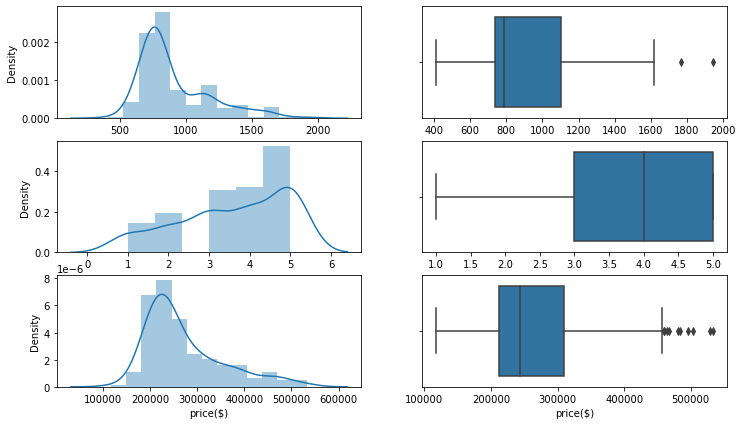

In [12]:
# Univariate Analysis
%matplotlib inline
fig, ax = plt.subplots(3, 2, figsize = (12,7))
sns.distplot(data['area'], ax = ax[0][0])
sns.boxplot(data['area'], ax = ax[0][1])
sns.distplot(data['deal_satisfaction'], ax = ax[1][0])
sns.boxplot(data['deal_satisfaction'], ax = ax[1][1])
sns.distplot(data['price($)'], ax = ax[2][0])
sns.boxplot(data['price($)'], ax = ax[2][1])
plt.show()

In [13]:
data[data['price($)'] > 500000]

,building,date_sale,type,property_number,area,entity,birth_date,gender,country,state,purpose,deal_satisfaction,mortgage,source,price($)
11,building_1,2006-08-01,Apartment,property_46,1942.50,Individual,1980-09-14,M,USA,California,Home,5.0,No,Website,503790.23
178,building_5,NaT,Apartment,property_52,1769.48,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532877.38
185,building_2,2006-10-01,Apartment,property_38,1604.75,Company,NaT,NaN,USA,California,Investment,5.0,No,Website,529317.28


In [14]:
# drop row 178
data = data.drop([178])

#### Data Wrangling

In [15]:
quality_report(data)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
building,5,0,0.00,object
date_sale,43,0,0.00,datetime64[ns]
type,2,0,0.00,object
property_number,58,0,0.00,object
area,74,0,0.00,float64
entity,2,0,0.00,object
birth_date,151,16,8.99,datetime64[ns]
gender,2,16,8.99,object
country,9,0,0.00,object
state,9,14,7.78,object


In [16]:
data.gender.fillna("M", inplace = True)
data.state.fillna('California', inplace = True)

In [17]:
# data.birth_date.median()

In [18]:
data.birth_date.fillna('1962-09-23', inplace = True)

In [19]:
data.isna().sum()

building             0
date_sale            0
type                 0
property_number      0
area                 0
entity               0
birth_date           0
gender               0
country              0
state                0
purpose              0
deal_satisfaction    0
mortgage             0
source               0
price($)             0
dtype: int64

#### Data Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
le= LabelEncoder()
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

for col in ['source', 'purpose']:
    data = onehot_encode(data, column = col)
for col in ['type', 'entity', 'mortgage', 'gender', 'country', 'state']:
    data[col] = le.fit_transform(data[col])

In [21]:
# building
data.building = data.building.replace('building_', '', regex = True)
data.building = data.building.astype(int)
# property number
data.property_number = data.property_number.replace('property_', '', regex = True)
data.property_number = data.property_number.astype(int)

In [22]:
data

,building,date_sale,type,property_number,area,entity,birth_date,gender,country,state,deal_satisfaction,mortgage,price($),source_Agency,source_Client,source_Website,purpose_Home,purpose_Investment
0,1,2005-11-01,0,30,743.09,1,1986-06-21 00:00:00,0,7,1,5.0,0,246172.68,0,0,1,1,0
1,1,2005-10-01,0,29,756.21,1,1983-02-24 00:00:00,0,7,1,5.0,0,246331.90,0,0,1,1,0
2,2,2007-07-01,0,2,587.28,1,1985-12-27 00:00:00,1,7,1,1.0,1,209280.91,0,1,0,1,0
3,2,2007-12-01,0,31,1604.75,1,1985-12-27 00:00:00,1,7,1,3.0,1,452667.01,0,0,1,0,1
4,1,2004-11-01,0,49,1375.45,1,1979-05-15 00:00:00,0,7,1,4.0,0,467083.31,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,2005-07-01,0,22,743.09,0,1962-09-23,1,8,1,5.0,0,210745.17,0,0,1,0,1
192,1,2005-07-01,0,28,1160.36,0,1962-09-23,1,8,1,5.0,0,331154.88,0,0,1,0,1
193,1,2005-07-01,0,34,625.80,0,1962-09-23,1,8,1,5.0,0,204434.68,0,0,1,0,1
194,1,2005-07-01,0,37,756.21,0,1962-09-23,1,8,1,5.0,0,189194.31,0,0,1,0,1


#### Feature Engineering

In [22]:
from datetime import datetime

In [23]:
max(data.date_sale)

Timestamp('2010-05-01 00:00:00')

In [24]:
# birth_date
data.birth_date = pd.to_datetime(data.birth_date)
data.birth_date_year = data.birth_date.dt.year
data.birth_date_month = data.birth_date.dt.month
data.birth_date_quarter = data.birth_date.dt.quarter

data.age = datetime.now().year - data.birth_date_year
# date_sale
data.date_sale = pd.to_datetime(data.date_sale)
data.date_sale_year = data.date_sale.dt.year
data.date_sale_month = data.date_sale.dt.month
data.date_sale_quarter = data.date_sale.dt.quarter

today = pd.to_datetime('2010-12-31')

data['duration_days'] = (today - data.date_sale).dt.days
data['duration_months'] = ((today - data.date_sale)/np.timedelta64(1, 'M')).astype(int)
data['is_month_end'] = data.date_sale.dt.is_month_end.astype(int)
data['is_month_start'] = data.date_sale.dt.is_month_start.astype(int)

data['year_month'] = data.date_sale_year.astype(str) + "_" + data.date_sale_month.astype(str)
data['year_month'], unique = pd.factorize(data['year_month'])

In [25]:
data.drop(['date_sale', 'birth_date'], axis = 1, inplace = True)

In [26]:
data

,building,type,property_number,area,entity,gender,country,state,deal_satisfaction,mortgage,...,source_Agency,source_Client,source_Website,purpose_Home,purpose_Investment,duration_days,duration_months,is_month_end,is_month_start,year_month
0,1,0,30,743.09,1,0,7,1,5.0,0,...,0,0,1,1,0,1886,61,0,1,0
1,1,0,29,756.21,1,0,7,1,5.0,0,...,0,0,1,1,0,1917,62,0,1,1
2,2,0,2,587.28,1,1,7,1,1.0,1,...,0,1,0,1,0,1279,42,0,1,2
3,2,0,31,1604.75,1,1,7,1,3.0,1,...,0,0,1,0,1,1126,36,0,1,3
4,1,0,49,1375.45,1,0,7,1,4.0,0,...,1,0,0,1,0,2251,73,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,0,22,743.09,0,1,8,1,5.0,0,...,0,0,1,0,1,2009,66,0,1,42
192,1,0,28,1160.36,0,1,8,1,5.0,0,...,0,0,1,0,1,2009,66,0,1,42
193,1,0,34,625.80,0,1,8,1,5.0,0,...,0,0,1,0,1,2009,66,0,1,42
194,1,0,37,756.21,0,1,8,1,5.0,0,...,0,0,1,0,1,2009,66,0,1,42


In [27]:
data.columns

Index(['building', 'type', 'property_number', 'area', 'entity', 'gender',
       'country', 'state', 'deal_satisfaction', 'mortgage', 'price($)',
       'source_Agency', 'source_Client', 'source_Website', 'purpose_Home',
       'purpose_Investment', 'duration_days', 'duration_months',
       'is_month_end', 'is_month_start', 'year_month'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 195
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building            194 non-null    int32  
 1   type                194 non-null    int32  
 2   property_number     194 non-null    int32  
 3   area                194 non-null    float64
 4   entity              194 non-null    int32  
 5   gender              194 non-null    int32  
 6   country             194 non-null    int32  
 7   state               194 non-null    int32  
 8   deal_satisfaction   194 non-null    float64
 9   mortgage            194 non-null    int32  
 10  price($)            194 non-null    float64
 11  source_Agency       194 non-null    uint8  
 12  source_Client       194 non-null    uint8  
 13  source_Website      194 non-null    uint8  
 14  purpose_Home        194 non-null    uint8  
 15  purpose_Investment  194 non-null    uint8  
 16  duration

In [29]:
data.drop(['is_month_end', 'is_month_start'], axis = 1, inplace = True)

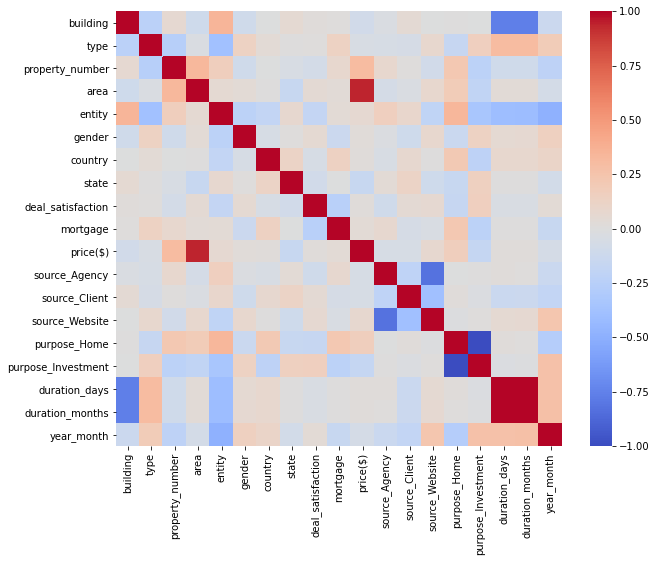

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [72]:
# creating new dataset
new_data = data[['area', 'price($)']]

In [36]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [39]:
model_xg = XGBRegressor()
model_lr = LinearRegression()

In [66]:
X, y = new_data.iloc[:, 0].values, new_data.iloc[:, -1].values

In [67]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.15, random_state = 0)   
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [69]:
model_lr.fit(x_train, y_train)  
# Predicting the Test set result;
x_test = x_test.reshape(-1, 1)
y_pred= model_lr.predict(x_test) 
print('Train Score: ', model_lr.score(x_train, y_train))  
print('Test Score: ', model_lr.score(x_test, y_test)) 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model_lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Train Score:  0.8788873122243539
Test Score:  0.9295916132128674
Model Coefficients: [[287.26904131]]
Mean Absolute Error: 15702.594634250163
Coefficient of Determination: 0.9295916132128674


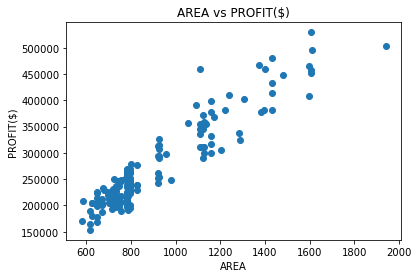

In [71]:
plt.scatter(x_train, y_train)
# plt.plot(x_train, model_lr.predict(y_train), color = 'red')
plt.title('AREA vs PROFIT($)')
plt.xlabel('AREA')
plt.ylabel('PROFIT($)')
plt.show()

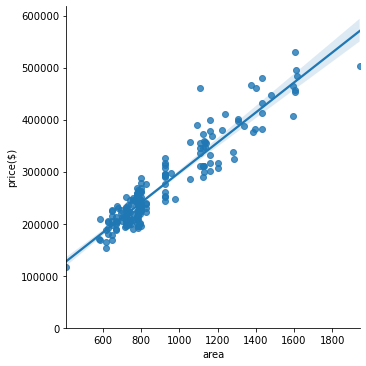

In [74]:
g = sns.lmplot(x = 'area', y = 'price($)', data = new_data)
g . set(ylim=(0, None))
plt.show()

In [75]:
df_predictions = pd.DataFrame({'actuals' : y_test, 'predictions' : y_pred, 'resid' : y_test - y_pred})
df_predictions

ValueError: Data must be 1-dimensional

In [46]:
model_xg.fit(x_train, y_train)  
# Predicting the Test set result;  
y_pred= model_xg.predict(x_test) 
print('Train Score: ', model_xg.score(x_train, y_train))  
print('Test Score: ', model_xg.score(x_test, y_test))
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

Train Score:  0.9315261653117428
Test Score:  0.8757331391016973
RMSE :  26192.907571


In [47]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_xg, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
model = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std())) 

Mean MAE: -27999.707 (5345.832)


In [48]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_lr, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
model = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: -22766.263 (4120.827)


In [50]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

y_pred = model.predict(x_test)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

164/164 - 6s - loss: 80468811776.0000 - 6s/epoch - 36ms/step
RMSE :  266727.108092


In [63]:
model_lr.predict(743.09)

ValueError: Expected 2D array, got scalar array instead:
array=734.09.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.